<a href="https://colab.research.google.com/github/NinaAbeyratne/Snaky---Snake-Identification-System/blob/Nina/DetectionModel_VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG19
from google.colab import drive
import pandas as pd

In [5]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
# Main directory where model data is saved
mainDataDirectory = "/content/drive/MyDrive/DSGP Group 24/Dataset/Component 1/Model_Data"

In [7]:
# Categories of image classification
imageCategories = ["no", "yes"]

# Directories for training and testing data
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

In [8]:
# Function to read images from a directory and add labels to each image
def read_images_from_directory(directory):
    #numpy arrays
    images = []
    labels = []
    for category in imageCategories:
        category_path = os.path.join(directory, category)
        label = imageCategories.index(category)

        for filename in os.listdir(category_path):
            image_path = os.path.join(category_path, filename)
            image = cv2.imread(image_path)
            images.append(image)
            if label == 0:
                labels.append("no")
            elif label == 1:
                labels.append("yes")
    return images, labels

In [9]:
# Read training images
# x for image and y for the lable
train_x, train_y = read_images_from_directory(trainDirectory)

# Read testing images
test_x, test_y = read_images_from_directory(testDirectory)

# Convert the lists to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [10]:
# Checking for the number of data
train_x.shape

(12921, 224, 224, 3)

In [11]:
test_x.shape

(3231, 224, 224, 3)

In [12]:
# Checking the categories in the dataset
np.unique(train_y)

array(['no', 'yes'], dtype='<U3')

In [13]:
# Map string labels to integer labels inorder for the model to read the data in integer format
label_mapping = {'no': 0, 'yes': 1}

# Convert string labels to integer labels
train_y = [label_mapping[label] for label in train_y]
test_y = [label_mapping[label] for label in test_y]

# Convert labels to one-hot encoded format
train_y_one_hot = to_categorical(train_y, num_classes=2)
test_y_one_hot = to_categorical(test_y, num_classes=2)

In [14]:

# Loading the vgg19 model and setting up the image size to train
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers to stop the weights from updating during training
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y_one_hot, epochs=10, batch_size=16, validation_data=(test_x, test_y_one_hot))


80134624/80134624 [==============================] - 5s 0us/step
Epoch 1/10
808/808 [==============================] - 91s 102ms/step - loss: 1.3152 - accuracy: 0.8584 - val_loss: 0.2194 - val_accuracy: 0.9226
Epoch 2/10
808/808 [==============================] - 85s 105ms/step - loss: 0.2589 - accuracy: 0.9023 - val_loss: 0.1871 - val_accuracy: 0.9236
Epoch 3/10
808/808 [==============================] - 86s 107ms/step - loss: 0.2069 - accuracy: 0.9145 - val_loss: 0.1935 - val_accuracy: 0.9338
Epoch 4/10
808/808 [==============================] - 86s 106ms/step - loss: 0.2073 - accuracy: 0.9130 - val_loss: 0.2642 - val_accuracy: 0.9319
Epoch 5/10
808/808 [==============================] - 81s 100ms/step - loss: 0.2230 - accuracy: 0.9135 - val_loss: 0.3511 - val_accuracy: 0.9050
Epoch 6/10
808/808 [==============================] - 86s 106ms/step - loss: 0.1884 - accuracy: 0.9248 - val_loss: 0.2944 - val_accuracy: 0.9282
Epoch 7/10
808/808 [==============================] - 86s 106ms/s

In [15]:
# Save the model
model.save('/content/drive/MyDrive/DSGP Group 24/Dataset/Component 1/Model/SnakeModel_VGG-19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Save the model
model.save('/content/drive/MyDrive/DSGP Group 24/Dataset/Component 1/Model/SnakeModel_VGG-19.keras')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 26447682 (100.89 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


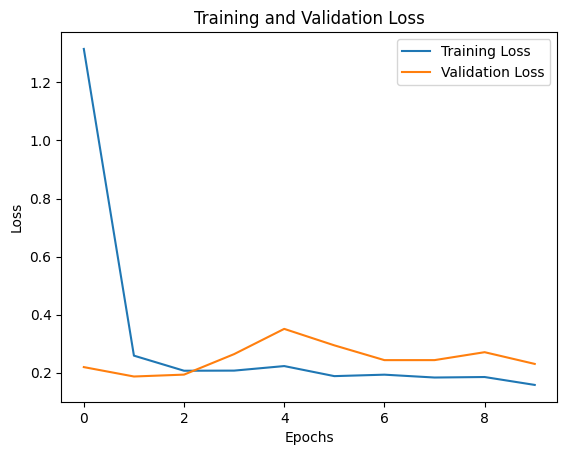

In [18]:
# Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

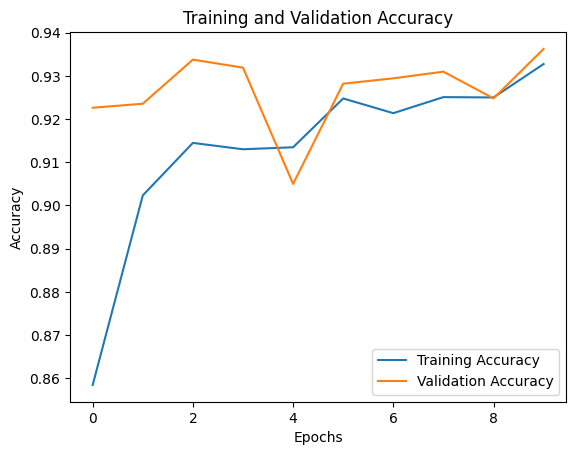

In [19]:
#Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

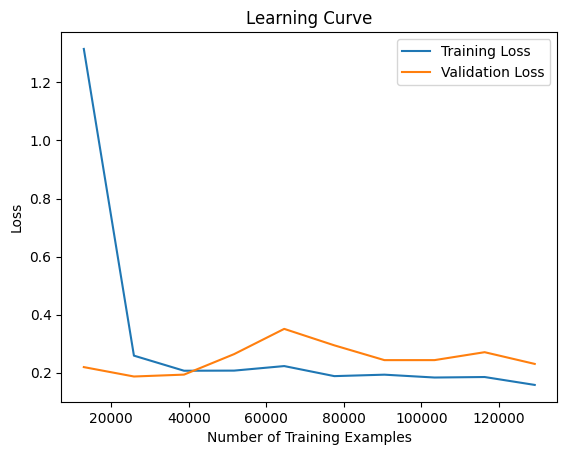

In [20]:
# Learning Curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Calculate the number of training examples per epoch
num_train_examples_per_epoch = len(train_x)

# Create an array of training sizes (number of examples seen)
train_sizes = np.arange(1, len(train_loss) + 1) * num_train_examples_per_epoch

# Plot the learning curve
plt.plot(train_sizes, train_loss, label='Training Loss')
plt.plot(train_sizes, val_loss, label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.legend()
plt.show()